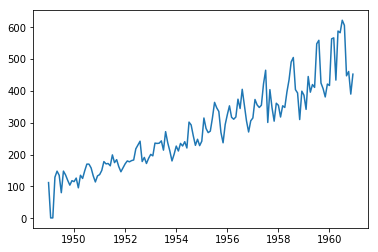

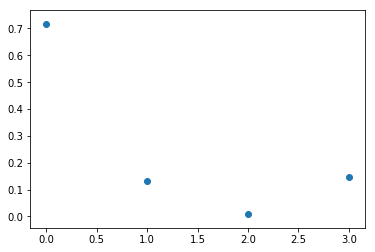

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.linalg import lstsq

f=open("flights.csv","r")
f.readline()

times=[]
X=[]

last=0
ces=0

while(1):
    ces+=1
    line=f.readline()
    line=line.rstrip()
    line=line.split(',')
    if(len(line)==1 and line[0] == ''):
        break

    t=np.double(line[0])
    if(len(line)>1 and line[1]!=''):
        x=np.double(line[1])
    else:
        x=np.double(0.0)
    if(x==0):
        plt.plot(times[last:ces],X[last:ces],color="blue")
        last=ces
    times.append(t)
    X.append(x)

plt.close()

M=4
N=len(X)-M

Y=[[x] for x in X]
X=Y

Xob=np.matrix(X)


def getGX():
    GX=[[np.double(0.0) for xvs in range(M)] for xvq in range(N)]
    for i in range(N):
        for j in range(0,M):
            GX[i][M-j-1]=X[j+i][0]
    return np.matrix(GX)

A=[[xvs+0.0] for xvs in range(M)]
A=np.matrix(A)

def getGA():
    GA=[[np.double(0.0) for xvs in range(len(X))] for xvq in range(N)]
    for i in range(N):
        for j in range(M):
            GA[i][i+j]=A[j,0]
        GA[i][i+M]=-1
        res=[]
    GA2=[]
    for i in range(N):
        GA2.append([])
        for j in range(len(X)):
            if(Xob[j,0]<0.00001):
                GA2[i].append(GA[i][j])
    return  [np.matrix(GA),np.matrix(GA2)]


T=1000

for i in range(len(X)):
   if(Xob[i,0]<0.0001):
       X[i][0]=1



for t in range(T):
    GX=getGX()
    V=np.transpose(GX)*GX
    B=X[M:]
    A=inv(V)*np.transpose(GX)*np.matrix(B)
  
    ar=getGA()
    GA=ar[0]
    GAem=ar[1]
    V=np.transpose(GAem)*GAem
    Xmi=inv(V)*np.transpose(GAem)*-GA*Xob
    
    ces=0
    for i in range(M,len(X)):
        if(Xob[i,0]<0.00001):
            X[i][0]=Xmi[ces,0]
            ces+=1

tX=[]
for i in range(len(X)):
    tX.append(X[i][0])

plt.close()
plt.plot(times,tX)
plt.show()

a=[]
for i in range(M):
    a.append(A[i,0])

plt.scatter(range(M),a)
plt.show()